In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Analyzed dataset was downloaded from Kaggle.com (https://www.kaggle.com/uciml/mushroom-classification). The main task is to classify if a given mushroom is edible or poisonous based on 22 features.

In [3]:
df=pd.read_csv('mushrooms.csv')

In [4]:
df.shape

(8124, 23)

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
columns=df.columns.to_list()

In [8]:
cat_var=[]
for column in columns:
    cat_var.append(df[column].unique())

In [9]:
cat_var

[array(['p', 'e'], dtype=object),
 array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object),
 array(['s', 'y', 'f', 'g'], dtype=object),
 array(['n', 'y', 'w', 'g', 'e', 'p', 'b', 'u', 'c', 'r'], dtype=object),
 array(['t', 'f'], dtype=object),
 array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object),
 array(['f', 'a'], dtype=object),
 array(['c', 'w'], dtype=object),
 array(['n', 'b'], dtype=object),
 array(['k', 'n', 'g', 'p', 'w', 'h', 'u', 'e', 'b', 'r', 'y', 'o'],
       dtype=object),
 array(['e', 't'], dtype=object),
 array(['e', 'c', 'b', 'r', '?'], dtype=object),
 array(['s', 'f', 'k', 'y'], dtype=object),
 array(['s', 'f', 'y', 'k'], dtype=object),
 array(['w', 'g', 'p', 'n', 'b', 'e', 'o', 'c', 'y'], dtype=object),
 array(['w', 'p', 'g', 'b', 'n', 'e', 'y', 'o', 'c'], dtype=object),
 array(['p'], dtype=object),
 array(['w', 'n', 'o', 'y'], dtype=object),
 array(['o', 't', 'n'], dtype=object),
 array(['p', 'e', 'l', 'f', 'n'], dtype=object),
 array(['k', 'n', 'u', 'h', 


Analyzed dataset is a table of 23 columns (features) and 8124 rows (observations). There are no null values. 
All columns contain categorical data.

22 features are the explanatory variables:

In [10]:
expl_columns=columns[1:]

In [11]:
for column in expl_columns:
    print(column + " (" + str(len(df[column].unique())) + " categories)" )

cap-shape (6 categories)
cap-surface (4 categories)
cap-color (10 categories)
bruises (2 categories)
odor (9 categories)
gill-attachment (2 categories)
gill-spacing (2 categories)
gill-size (2 categories)
gill-color (12 categories)
stalk-shape (2 categories)
stalk-root (5 categories)
stalk-surface-above-ring (4 categories)
stalk-surface-below-ring (4 categories)
stalk-color-above-ring (9 categories)
stalk-color-below-ring (9 categories)
veil-type (1 categories)
veil-color (4 categories)
ring-number (3 categories)
ring-type (5 categories)
spore-print-color (9 categories)
population (6 categories)
habitat (7 categories)


The target (explained) feature is:

- "class" (2 categories - posionous/edible mushroom).

<H4> Null values </H4>

In 'stalk-root' variable a 2480 missing values were found. Because all other columns have all data valid, this column will be removed.

In [12]:
df.drop('stalk-root', axis='columns', inplace=True)

<H1> Exploratory data analysis </H1>

All data are categorical. Variables are related to a different parts of mushroom and can be divided into following groups:
- cap data (3 columns),
- gill data (4 columns),
- stalk data (6 columns),
- veil data (2 columns),
- ring data (2 columns),
- other (bruises, odor, spore color, population, habitat).

<H3> Explanatory variables </H3>

<H4>Cap data</H4>

Cap data are explained using three categorical variables:

- cap shape,
- cap surface and
- cap color.

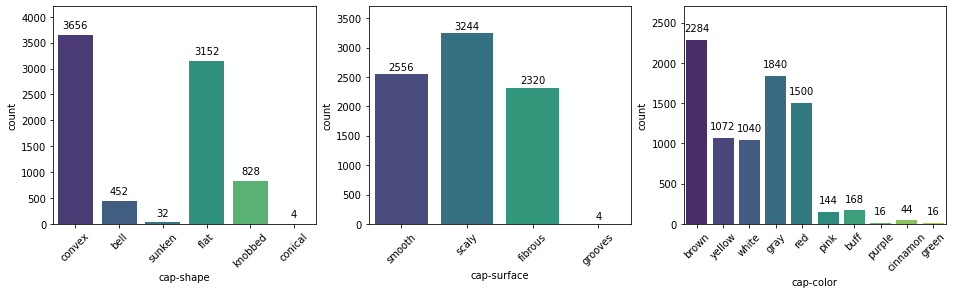

In [12]:
plt.figure(figsize=(16,4))
ax0=plt.subplot(1,3,1)
sns.countplot(x='cap-shape', data=df, palette='viridis')
plt.ylim([0,4200])
ax0.set_xticklabels(['convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical'], rotation=45)
for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='top', color='black', size=10)
ax1=plt.subplot(1,3,2)  
sns.countplot(x='cap-surface', data=df, palette='viridis')
ax1.set_xticklabels(['smooth', 'scaly', 'fibrous', 'grooves'], rotation=45)
plt.ylim([0,3700])
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+400), ha='center', va='top', color='black', size=10)
ax2=plt.subplot(1,3,3)  
sns.countplot(x='cap-color', data=df, palette='viridis')
ax2.set_xticklabels(['brown', 'yellow', 'white', 'gray', 'red', 'pink', 'buff', 'purple', 'cinnamon', 'green'], rotation=45)
plt.ylim([0,2700])
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+350), ha='center', va='top', color='black', size=10)    

<H4>Gill data</H4>

Gill data are explained using four categorical variables:

- gill attachment,
- gill spacing,
- gill size and
- gill color.

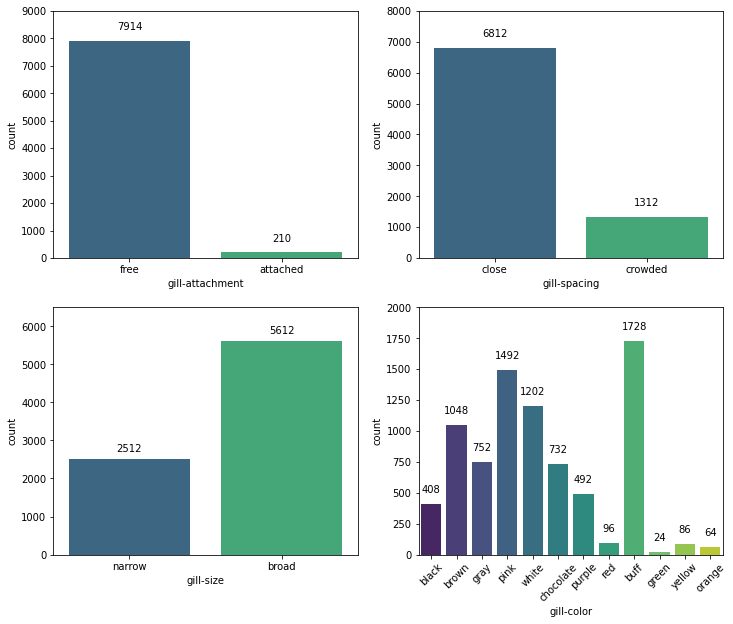

In [13]:
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.2,hspace=0.2)
ax0=plt.subplot(2,2,1)
sns.countplot(x='gill-attachment', data=df, palette='viridis')
plt.ylim([0,9000])
ax0.set_xticklabels(['free', 'attached'])
for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+1100), ha='center', va='top', color='black', size=10)
ax1=plt.subplot(2,2,2)  
sns.countplot(x='gill-spacing', data=df, palette='viridis')
ax1.set_xticklabels(['close', 'crowded'])
plt.ylim([0,8000])
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+1000), ha='center', va='top', color='black', size=10)
ax2=plt.subplot(2,2,3)  
sns.countplot(x='gill-size', data=df, palette='viridis')
ax2.set_xticklabels(['narrow', 'broad'])
plt.ylim([0,6500])
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+700), ha='center', va='top', color='black', size=10)    
ax3=plt.subplot(2,2,4)  
sns.countplot(x='gill-color', data=df, palette='viridis')
ax3.set_xticklabels(['black', 'brown', 'gray', 'pink', 'white', 'chocolate', 'purple', 'red', 'buff', 'green', 'yellow', 'orange'], rotation=45)
plt.ylim([0,2000])
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+250), ha='center', va='top', color='black', size=10)        

Because in 'gill attachment' category, one category (attached) is a lot smaller than free gill category, this variable won't be important in our classification algorythm. Therefore it will be removed.

In [14]:
df.drop('gill-attachment', axis='columns', inplace=True)

<H4>Stalk data</H4>

Stal data are explained using five categorical variables (stalk-root variable is removed):

- stalk shape,
- stalk surface above ring,
- stalk surface below ring,
- stalk color above ring and
- stalk color below ring.

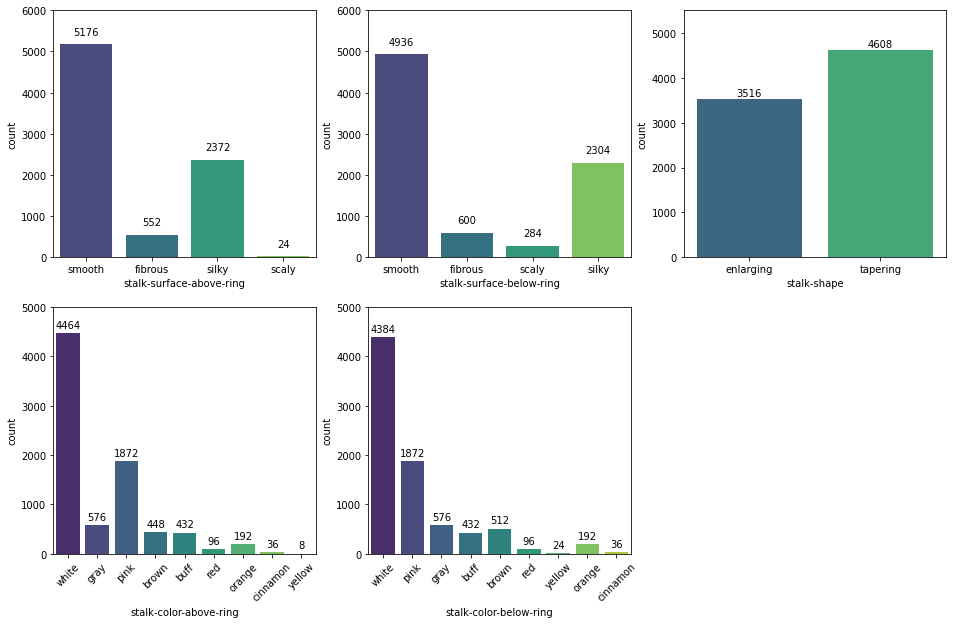

In [15]:
plt.figure(figsize=(16,10))
#plt.subplots_adjust(wspace=0.2,hspace=0.2)
ax0=plt.subplot(2,3,3)
sns.countplot(x='stalk-shape', data=df, palette='viridis')
plt.ylim([0,5500])
ax0.set_xticklabels(['enlarging', 'tapering'])
for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='top', color='black', size=10)
ax1=plt.subplot(2,3,1)  
sns.countplot(x='stalk-surface-above-ring', data=df, palette='viridis')
ax1.set_xticklabels(['smooth', 'fibrous', 'silky', 'scaly'])
plt.ylim([0,6000])
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+700), ha='center', va='top', color='black', size=10)
ax2=plt.subplot(2,3,2)  
sns.countplot(x='stalk-surface-below-ring', data=df, palette='viridis')
ax2.set_xticklabels(['smooth', 'fibrous', 'scaly', 'silky'])
plt.ylim([0,6000])
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+700), ha='center', va='top', color='black', size=10)    
ax3=plt.subplot(2,3,4)  
sns.countplot(x='stalk-color-above-ring', data=df, palette='viridis')
ax3.set_xticklabels(['white', 'gray', 'pink', 'brown', 'buff', 'red', 'orange', 'cinnamon', 'yellow'], rotation=45)
plt.ylim([0,5000])
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='top', color='black', size=10)        
ax4=plt.subplot(2,3,5)  
sns.countplot(x='stalk-color-below-ring', data=df, palette='viridis')
ax4.set_xticklabels(['white', 'pink', 'gray', 'buff', 'brown', 'red', 'yellow', 'orange', 'cinnamon'], rotation=45)
plt.ylim([0,5000])
for p in ax4.patches:
    ax4.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='top', color='black', size=10)        

<H4>Veil data</H4>

Veil data are explained using two categorical variables:

- veil type and
- veil color.

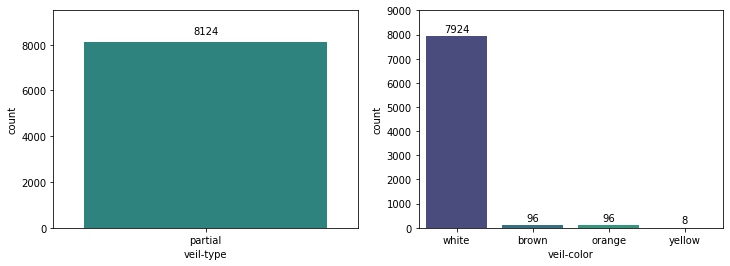

In [16]:
plt.figure(figsize=(12,4))
ax0=plt.subplot(1,2,1)
sns.countplot(x='veil-type', data=df, palette='viridis')
plt.ylim([0,9500])
ax0.set_xticklabels(['partial'])
for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+1200), ha='center', va='top', color='black', size=10)
ax1=plt.subplot(1,2,2)  
sns.countplot(x='veil-color', data=df, palette='viridis')
ax1.set_xticklabels(['white', 'brown', 'orange', 'yellow'])
plt.ylim([0,9000])
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+1000), ha='center', va='top', color='black', size=10)

Both variables - veil-type and veil-color are poorly differentiated, and won't improve our classification algorythm, therefore both will be removed.

In [17]:
df.drop(['veil-type','veil-color'], axis='columns', inplace=True)

In [18]:
df.shape

(8124, 20)

<H4>Ring data</H4>

Ring data are explained using two categorical variables:

- ring number and
- ring type.

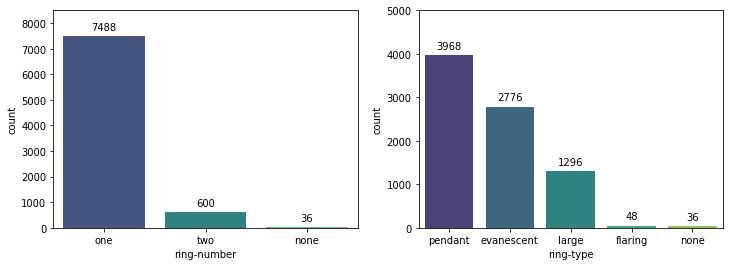

In [19]:
plt.figure(figsize=(12,4))
ax0=plt.subplot(1,2,1)
sns.countplot(x='ring-number', data=df, palette='viridis')
plt.ylim([0,8500])
ax0.set_xticklabels(['one', 'two', 'none'])
for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+1000), ha='center', va='top', color='black', size=10)
ax1=plt.subplot(1,2,2)  
sns.countplot(x='ring-type', data=df, palette='viridis')
ax1.set_xticklabels(['pendant', 'evanescent', 'large', 'flaring', 'none'])
plt.ylim([0,5000])
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+600), ha='center', va='top', color='black', size=10)

Ring number variable turned out to be quantitative discrete and can be treated and used in model as integer value. In order to reduce number of columns after one-hot-encoding process, in this column categorical data will be changed to numerical.

In [20]:
df['ring-number'].replace({'o':1, 't':2, 'n':0}, inplace=True)
df['ring-number'].head()

0    1
1    1
2    1
3    1
4    1
Name: ring-number, dtype: int64

<H3> Other data</H3>

In category "other" fell 5 variables:
- bruises, 
- odor, 
- spore color, 
- population and 
- habitat.

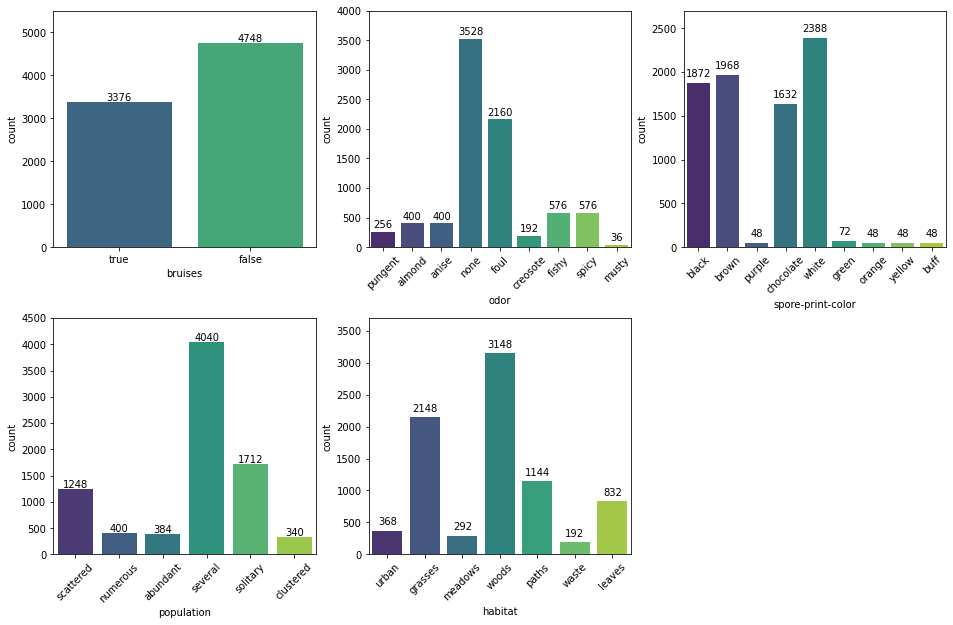

In [21]:
plt.figure(figsize=(16,10))
plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax0=plt.subplot(2,3,1)
sns.countplot(x='bruises', data=df, palette='viridis')
plt.ylim([0,5500])
ax0.set_xticklabels(['true', 'false'])
for p in ax0.patches:
    ax0.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='top', color='black', size=10)
ax1=plt.subplot(2,3,2)  
sns.countplot(x='odor', data=df, palette='viridis')
ax1.set_xticklabels(['pungent', 'almond', 'anise', 'none', 'foul', 'creosote', 'fishy', 'spicy', 'musty'], rotation=45)
plt.ylim([0,4000])
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+400), ha='center', va='top', color='black', size=10)
ax2=plt.subplot(2,3,3)  
sns.countplot(x='spore-print-color', data=df, palette='viridis')
ax2.set_xticklabels(['black', 'brown', 'purple', 'chocolate', 'white', 'green', 'orange', 'yellow', 'buff'], rotation = 45)
plt.ylim([0,2700])
for p in ax2.patches:
    ax2.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+300), ha='center', va='top', color='black', size=10)    
ax3=plt.subplot(2,3,4)  
sns.countplot(x='population', data=df, palette='viridis')
ax3.set_xticklabels(['scattered', 'numerous', 'abundant', 'several', 'solitary', 'clustered'], rotation=45)
plt.ylim([0,4500])
for p in ax3.patches:
    ax3.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+400), ha='center', va='top', color='black', size=10)        
ax4=plt.subplot(2,3,5)  
sns.countplot(x='habitat', data=df, palette='viridis')
ax4.set_xticklabels(['urban', 'grasses', 'meadows', 'woods', 'paths', 'waste', 'leaves'], rotation=45)
plt.ylim([0,3700])
for p in ax4.patches:
    ax4.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+400), ha='center', va='top', color='black', size=10)        

<H4> Target feature </H4>

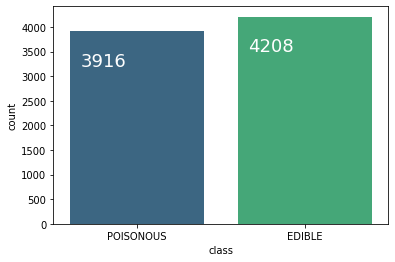

In [22]:
ax = plt.subplot()
sns.countplot(data = df, x=df['class'], palette='viridis')
ax.set_xticklabels(['POISONOUS', 'EDIBLE'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In this dataset 3916 mushrooms are poisonous and 4208 are edible. Number of both categories are relatively similar, so this dataset will be treated as balanced.

<H3> Bivariate analysis </H3>

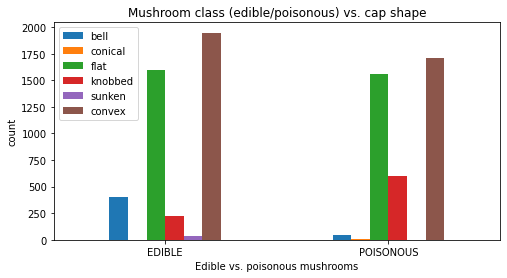

In [23]:
pd.crosstab(df['class'],df['cap-shape']).plot(kind='bar', figsize=(8,4))
ax=plt.subplot()
ax.set_xticklabels(['EDIBLE', 'POISONOUS'], rotation = 0)
plt.title('Mushroom class (edible/poisonous) vs. cap shape')
plt.ylabel('count')
plt.xlabel('Edible vs. poisonous mushrooms')
plt.legend(['bell', 'conical', 'flat', 'knobbed', 'sunken', 'convex'], loc='best')
plt.show()

In [24]:
pd.crosstab(df['class'],df['cap-shape'])

cap-shape,b,c,f,k,s,x
class,,,,,,
e,404,0,1596,228,32,1948
p,48,4,1556,600,0,1708


In this dataset:
- mushrooms with conical cap were poisonous,
- mushrooms with sunken cap were edible.

Hovewer, it needs to be noted, that samples of mushrooms with conical (4 samples) or sunken (32 samples) cap are small and may not be representative.  
Other cap-shapes are in both edible/poisonous categories.

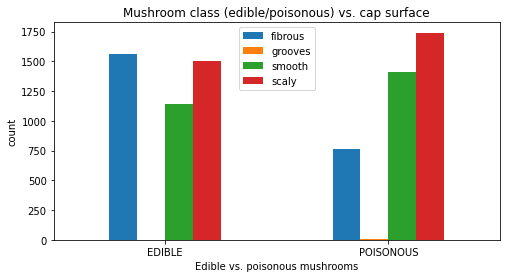

In [25]:
pd.crosstab(df['class'], df['cap-surface']).plot(kind='bar', figsize=(8,4))
ax=plt.subplot()
ax.set_xticklabels(['EDIBLE', 'POISONOUS'], rotation = 0)
plt.title('Mushroom class (edible/poisonous) vs. cap surface')
plt.ylabel('count')
plt.xlabel('Edible vs. poisonous mushrooms')
plt.legend(['fibrous', 'grooves', 'smooth', 'scaly'], loc='upper center')
plt.show()

In [26]:
pd.crosstab(df['class'], df['cap-surface'])

cap-surface,f,g,s,y
class,,,,
e,1560,0,1144,1504
p,760,4,1412,1740


In this dataset mushrooms having caps with groovy surface are poisonous. However, only four of over 8000 mushrooms have this type of cap surface and may not by representative.
Other cap-surfaces are in both edible/poisonous categories.

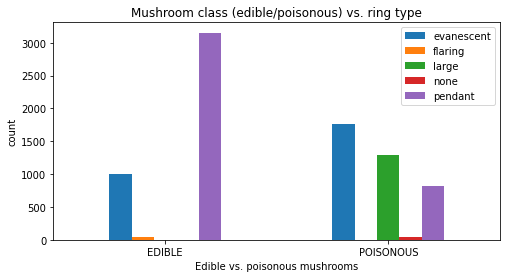

In [27]:
pd.crosstab(df['class'], df['ring-type']).plot(kind='bar', figsize=(8,4))
ax=plt.subplot()
ax.set_xticklabels(['EDIBLE', 'POISONOUS'], rotation = 0)
plt.title('Mushroom class (edible/poisonous) vs. ring type')
plt.ylabel('count')
plt.xlabel('Edible vs. poisonous mushrooms')
plt.legend(['evanescent', 'flaring', 'large', 'none', 'pendant'], loc='best')
plt.show()

In [28]:
pd.crosstab(df['class'], df['ring-type'])

ring-type,e,f,l,n,p
class,,,,,
e,1008,48,0,0,3152
p,1768,0,1296,36,816


In this dataset:
- all mushrooms with flaring ring were edible (48 samples),
- all mushrooms with large ring (1296 samples) and without ring (36 samples) were poisonous.
Other types of rings were in both edible and poisonous mushrooms.

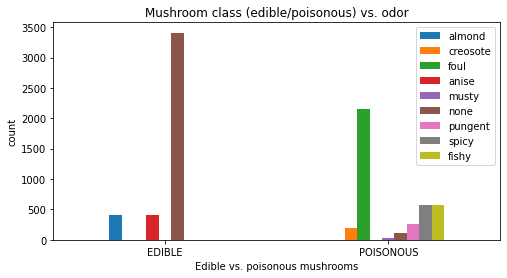

In [29]:
pd.crosstab(df['class'], df['odor']).plot(kind='bar', figsize=(8,4))
ax=plt.subplot()
ax.set_xticklabels(['EDIBLE', 'POISONOUS'], rotation = 0)
plt.title('Mushroom class (edible/poisonous) vs. odor')
plt.ylabel('count')
plt.xlabel('Edible vs. poisonous mushrooms')
plt.legend(['almond', 'creosote', 'foul', 'anise', 'musty', 'none', 'pungent', 'spicy', 'fishy'], loc='best')
plt.show()

In [30]:
pd.crosstab(df['class'], df['odor'])

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0
p,0,192,2160,0,36,120,256,576,576


In this dataset:
- edible mushrooms have no smell or smell like almonds or anise,
- remaining odor categories are describing poisonous mushrooms, 
- some poisonous mushrooms (120 samples) have no smell.

This category is the most clear in the entire dataset.

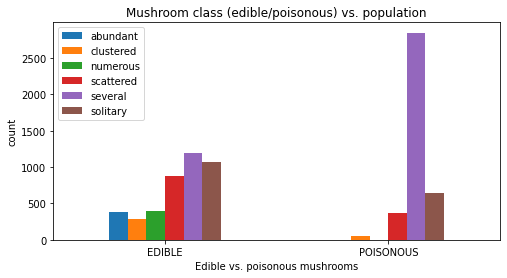

In [31]:
pd.crosstab(df['class'], df['population']).plot(kind='bar', figsize=(8,4))
ax=plt.subplot()
ax.set_xticklabels(['EDIBLE', 'POISONOUS'], rotation = 0)
plt.title('Mushroom class (edible/poisonous) vs. population')
plt.ylabel('count')
plt.xlabel('Edible vs. poisonous mushrooms')
plt.legend(['abundant', 'clustered', 'numerous', 'scattered', 'several', 'solitary'], loc='best')
plt.show()

In [32]:
pd.crosstab(df['class'], df['population'])

population,a,c,n,s,v,y
class,,,,,,
e,384,288,400,880,1192,1064
p,0,52,0,368,2848,648


From this dataset we can obtain information, that poisonous mushrooms can appear in numerous and abundant groups, whereas it is not characteristic for edible mushrooms.

<H3>Data preprocessing</H3>

The following models will be used for the classifiation:

- multinomial logistic regression,
- kNN,
- decision tree.

<H3> Splitting data </H3> 

- Firstly a two datasets containing independent variables and labels (target column) need to be prapared. In this case X will be the independent variables datatset and Y will be the target column

In [33]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,c,n,k,e,e,s,s,w,w,1,p,k,s,u
1,e,x,s,y,t,a,c,b,k,e,c,s,s,w,w,1,p,n,n,g
2,e,b,s,w,t,l,c,b,n,e,c,s,s,w,w,1,p,n,n,m
3,p,x,y,w,t,p,c,n,n,e,e,s,s,w,w,1,p,k,s,u
4,e,x,s,g,f,n,w,b,k,t,e,s,s,w,w,1,e,n,a,g


In [34]:
X = df.iloc[:, 1:]
Y = df.iloc[:, :1]

<H3>Dummy variables</H3>

In order to deal with categorical variables, they will be changed into categorical variables (each category for a given variable will obtain it's binary identifier).


In [35]:
X = pd.get_dummies(X)
X.head()

,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


<H3> Train/Test split</H3>

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

In [37]:
print(len(Y_train),len(Y_test))

5686 2438


<H3> Logisic regression</H3>
- because we have more than two categories into which data will be classified, we have to use multinomial logistic regression.

In [38]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(multi_class="multinomial")
lr_model.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [39]:
lr_predictions = lr_model.predict(X_train)

<H3> Model accuracy</H3>

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      2951
           p       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686



- Accuracy - correct values divided by total values.
- Precision - True Positives divided by the sum of True Positives and False Negatives (true positives divided by the actual positive values).
- Recall - True Positives divided by the sum of True Positives and False Positives (true positives divided by the positive guesses).
- F1-score - blended score of precision and recall which balances both values.
- Macro Avg - unweighted mean value of precision and recall.
- Weighted Avg - weighted mean value of precision and recall by the support values for each class.
- Support - number of observations in class to predict.

(description from Codecademy.com materials)

<H3> Model testing </H3>

In [41]:
lr_pred = lr_model.predict(X_test)
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [42]:
from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(lr_pred,Y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

Logistic Regression accuracy is: 100.00%


<H3> k-Nearest Neighbors model </H3>

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
accuracies = []
for k in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)
    accuracies.append(classifier.score(X_train, Y_train))

In [45]:
k_list = range(1,50)

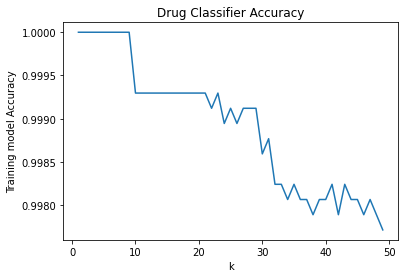

In [46]:
plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('Training model Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

<H3> Model testing </H3>

In [47]:
accuracies_test = []
for k in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)
    accuracies_test.append(classifier.score(X_test,Y_test))

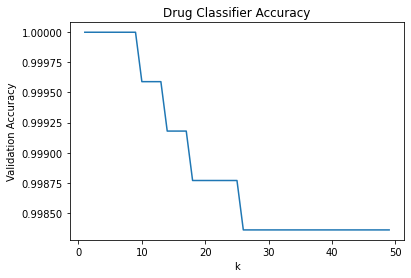

In [48]:
plt.plot(k_list, accuracies_test)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Drug Classifier Accuracy')
plt.show()

In [49]:
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model.fit(X_train, Y_train)
knn_pred = knn_model.predict(X_test)

In [50]:
knn_pred

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [51]:
Y_test

array(['e', 'p', 'p', ..., 'p', 'e', 'e'], dtype=object)

In [52]:
print(classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [53]:
kNNAcc = accuracy_score(knn_pred,Y_test)
print('kNN model accuracy is: {:.2f}%'.format(kNNAcc*100))

kNN model accuracy is: 99.92%


<H3> Decision tree </H3>

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state = 42, max_depth=10)
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [55]:
predictions = tree_model.predict(X_test)

In [56]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [57]:
TreeAcc = accuracy_score(predictions,Y_test)
print('Decision tree model accuracy is: {:.2f}%'.format(TreeAcc*100))

Decision tree model accuracy is: 100.00%


In [58]:
#from sklearn import tree

#fig = plt.figure(figsize=(25,20))
#_ = tree.plot_tree(tree_model, 
#                   feature_names=X.columns,  
#                   class_names=['EDIBLE', 'POISONOUS'],
#                   filled=True)

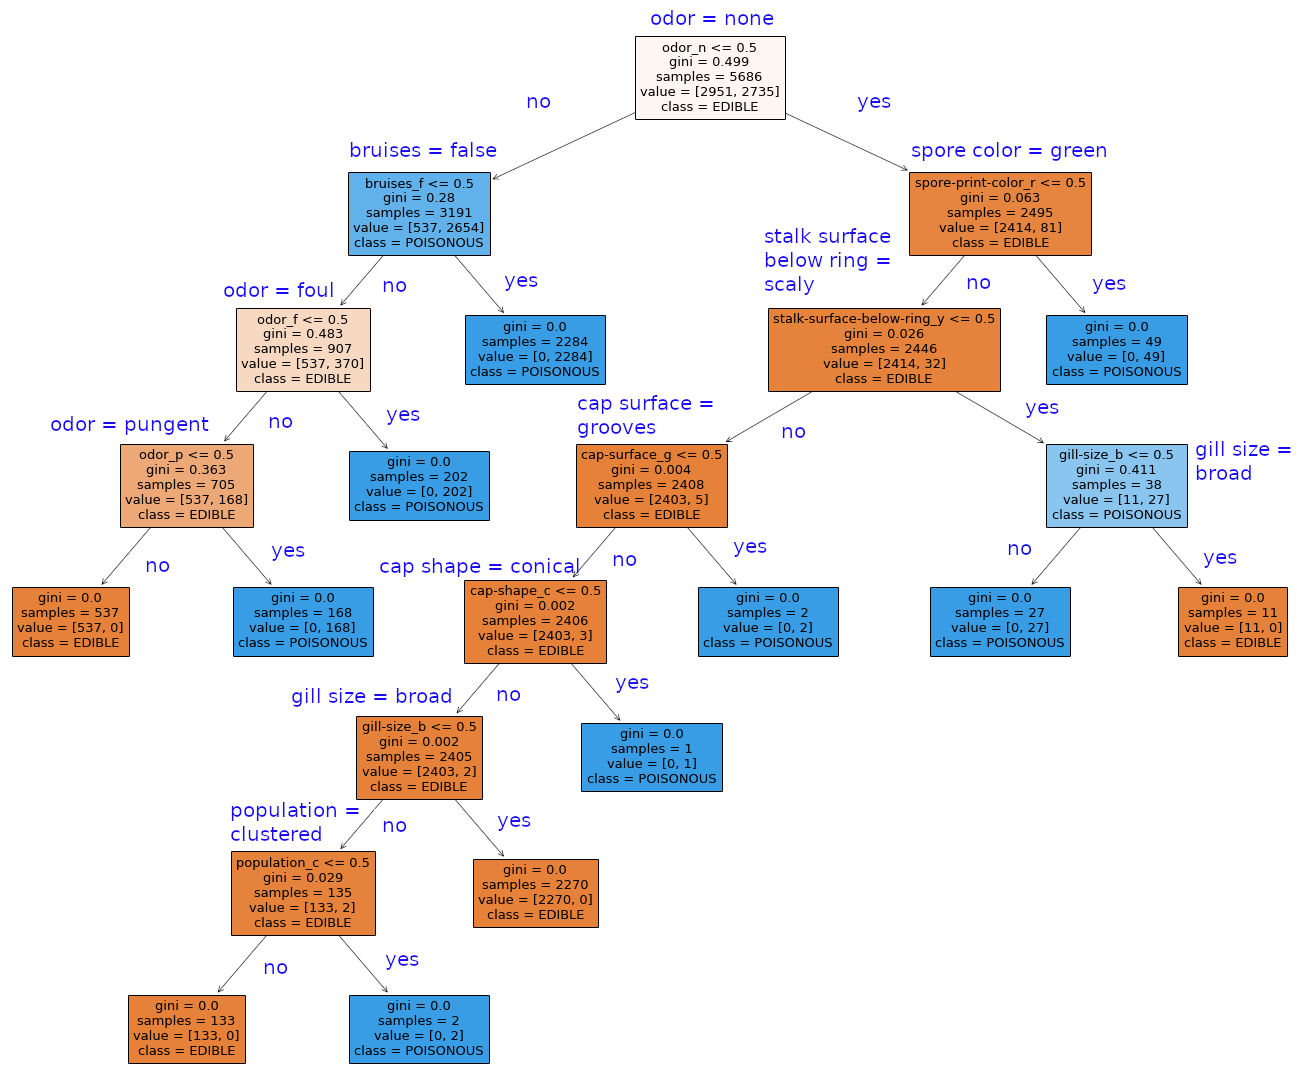

In [59]:
#fig.savefig("decistion_tree.png")

According to decision tree and analyzed dataset:
- smelly mushrooms without bruises are poisonous (2284 samples)
- smelly mushrooms with bruises and foul odor are poisonous (202 samples)
- smelly mushrooms with bruises and pungent odor are poisonous (168 samples)
- smelly mushrooms with bruises and odor other than pungent are edible (537 samples)
- odorless mushrooms with green spores are poisonous (49 samples)
- odorless mushrooms with grooves on cap surface are poisonous (2 samples)
- odorless mushrooms with conical cap shape are poisonous (1 sample)
- odorless mushrooms with broad gill are edible (2270 samples)
- odorless mushrooms growing in clustered gropus are poisonous (2 samples)
- odorless mushrooms growing in other than clustered groups are edible (133 samples)
- odorless mushrooms with scaly stalk surface below ring and broad gill size are edible (11 samples)
- odorless mushrooms with scaly stalk surface below ring and narrow gill size are poisonous (27 samples)